# Tutorial notebook to run vis_cpu

In this notebook we will set up different input parameters required for **vis_cpu**, and finally run the **vis_cpu** to generate visibilities for point sources. Also, we will plot the generated visibility amplitude and phase as a function of frequency and LST.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.coordinates import EarthLocation

from vis_cpu import conversions, simulate_vis
from pyuvsim.analyticbeam import AnalyticBeam

# Initialize Observation parameters

Set the antenna dictionary which contains the antenna index and co-ordinates. We also set different primary beam (PB) of each antennas using a list of UVBeam object (here Gaussian and Uniform PB are used for 2 antennas).

In [2]:
nants = 2

ants = {}
for i in range(nants):
    ants.update([(i, (-(i % 3), i, i % 4))])

#set different UVBeam for each antenna
beam = [AnalyticBeam("gaussian", sigma=0.5), AnalyticBeam("uniform")]

Set the input parameters (e.g. no. of frequencies, start freq (in Hz), end fequency (in Hz), no. of time samples, start lst (in rad), end lst (in rad).

In [3]:
Nfreqs = 10
start_freq = 100000000.0 # in Hz
end_freq = 120000000.0 # in Hz
freqs = np.linspace(start_freq , end_freq, Nfreqs) # freqs in Hz

In [4]:
Ntimes = 20
start_lst = np.pi / 1.5 # in rad
end_lst  = np.pi / 1.3 # in rad
lsts = np.linspace(start_lst, end_lst, Ntimes) # lsts in rad

# Initialize source parameters

Set the source parameters (total no. of point sources, ra (rad), dec (rad), flux (in Jy) and sp. index

In [5]:
nsource = 2

ra = np.deg2rad(np.linspace(0. , 30., nsource)) # ra of each source (in rad)
dec = np.deg2rad(np.linspace(-25. , -35., nsource)) # dec of each source (in rad)
flux = np.ones(nsource) # flux of each sources (in Jy)
sp_index = np.zeros(nsource) # sp. index of each source

flux_allfreq = ((freqs[:, np.newaxis] / freqs[0]) ** sp_index.T * flux.T).T

# Correct source locations so that vis_cpu uses the right frame

Set telescope parameters (longitude (in deg), latitude (in deg), height (in meter). It converts the ra, dec into the ECI (Earth-Centered Inertial) system used by vis_cpu.

In [6]:
hera_lon = 21.428305555555557
hera_lat = -30.72152777777791
hera_height = 1073.0000000093132

location = EarthLocation.from_geodetic(lat=hera_lat, lon=hera_lon, height=hera_height)

In [7]:
obstime = Time("2018-08-31T04:02:30.11", format="isot", scale="utc")

ra_new, dec_new = conversions.equatorial_to_eci_coords(
    ra, dec, obstime, location, unit="rad", frame="icrs"
)

# Run vis_cpu

Use all the paramters above to run vis_cpu, which ouputs a complex visibility array. If `polarized = True`, the output will have shape (NAXES, NFEED, NFREQS, NTIMES, NANTS, NANTS), otherwise it will have
        shape (NFREQS, NTIMES, NANTS, NANTS)

In [8]:
# simulate visibilities 
vis_vc = simulate_vis(
        ants=ants,
        fluxes=flux_allfreq,
        ra=ra_new,
        dec=dec_new,
        freqs=freqs,
        lsts=lsts,
        beams=beam,
        pixel_beams=False,
        polarized=False,
        precision=2,
    )

In [9]:
vis_vc.shape

(10, 20, 2, 2)

# Plot auto and cross visibilities

Here, we plot the visibility amplitude and phase as a function of frequency and LSTs. For auto-correlation (e.g. antenna pair (0,0)) we expect the phase would be zero. Here, the amplitude is constant with frequency as we assumed the spectral of the sources are zero.

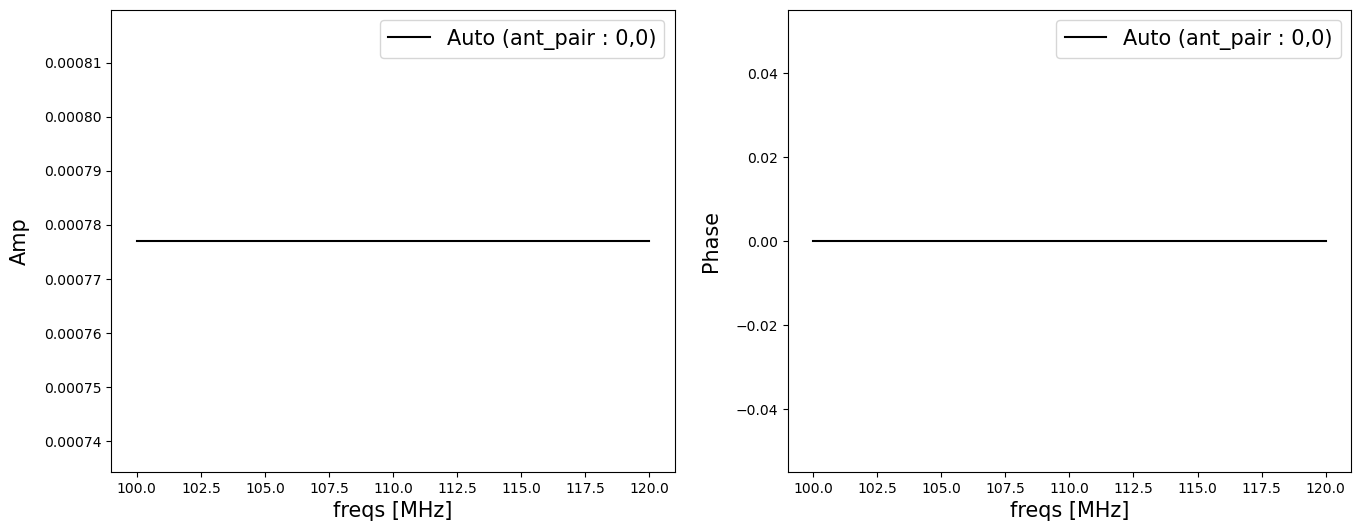

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(freqs/1.e6, np.abs(vis_vc[:,0,0,0]),'k', label=r'Auto (ant_pair : 0,0)')
ax[0].set_ylabel('Amp', fontsize=15,labelpad=10)
ax[0].set_xlabel(r'freqs [MHz]', fontsize=15)
ax[0].legend(fontsize=15)


ax[1].plot(freqs/1.e6, np.angle(vis_vc[:,0,0,0]),'k', label=r'Auto (ant_pair : 0,0)')
ax[1].set_ylabel('Phase', fontsize=15,labelpad=10)
ax[1].set_xlabel(r'freqs [MHz]', fontsize=15)
ax[1].legend(fontsize=15)

plt.show()

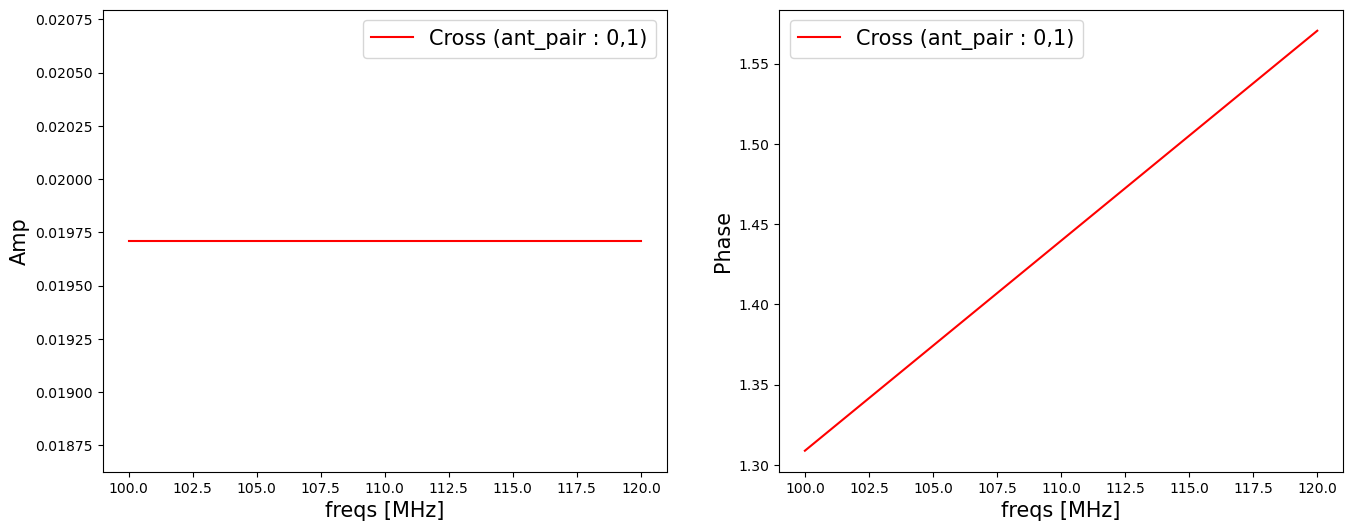

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(freqs/1.e6, np.abs(vis_vc[:,0,0,1]),'r', label=r'Cross (ant_pair : 0,1)')
ax[0].set_ylabel('Amp', fontsize=15)
ax[0].set_xlabel(r'freqs [MHz]', fontsize=15)
ax[0].legend(fontsize=15)


ax[1].plot(freqs/1.e6, np.angle(vis_vc[:,0,0,1]),'r', label=r'Cross (ant_pair : 0,1)')
ax[1].set_ylabel('Phase', fontsize=15)
ax[1].set_xlabel(r'freqs [MHz]', fontsize=15)
ax[1].legend(fontsize=15)

plt.show()

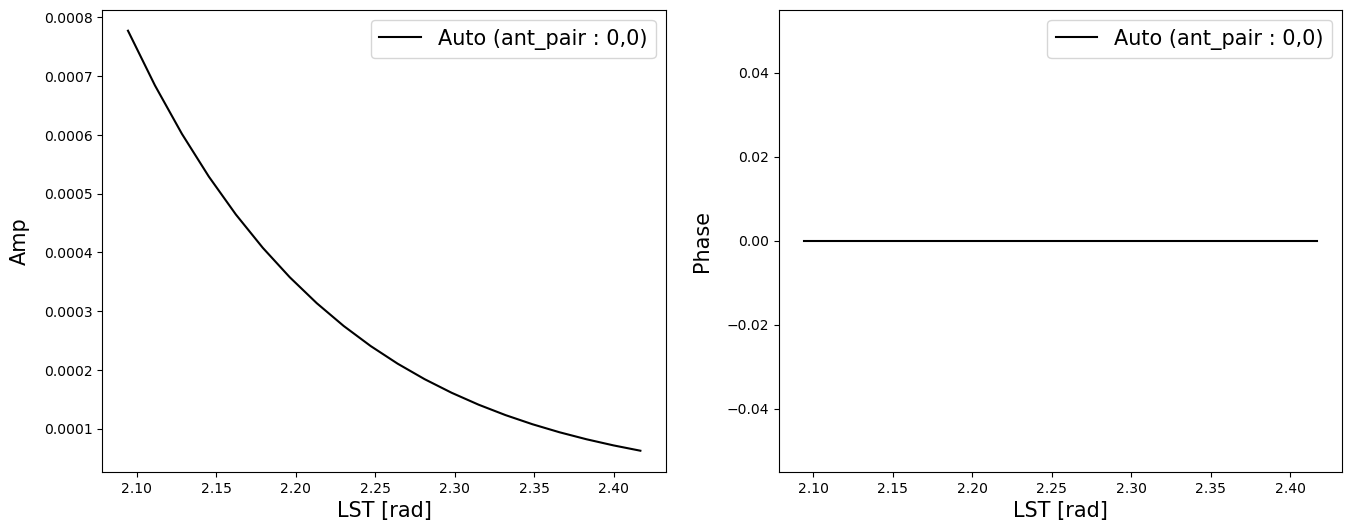

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(lsts, np.abs(vis_vc[0,:,0,0]),'k', label=r'Auto (ant_pair : 0,0)')
ax[0].set_ylabel('Amp', fontsize=15,labelpad=10)
ax[0].set_xlabel(r'LST [rad]', fontsize=15)
ax[0].legend(fontsize=15)


ax[1].plot(lsts, np.angle(vis_vc[0,:,0,0]),'k', label=r'Auto (ant_pair : 0,0)')
ax[1].set_ylabel('Phase', fontsize=15,labelpad=10)
ax[1].set_xlabel(r'LST [rad]', fontsize=15)
ax[1].legend(fontsize=15)

plt.show()

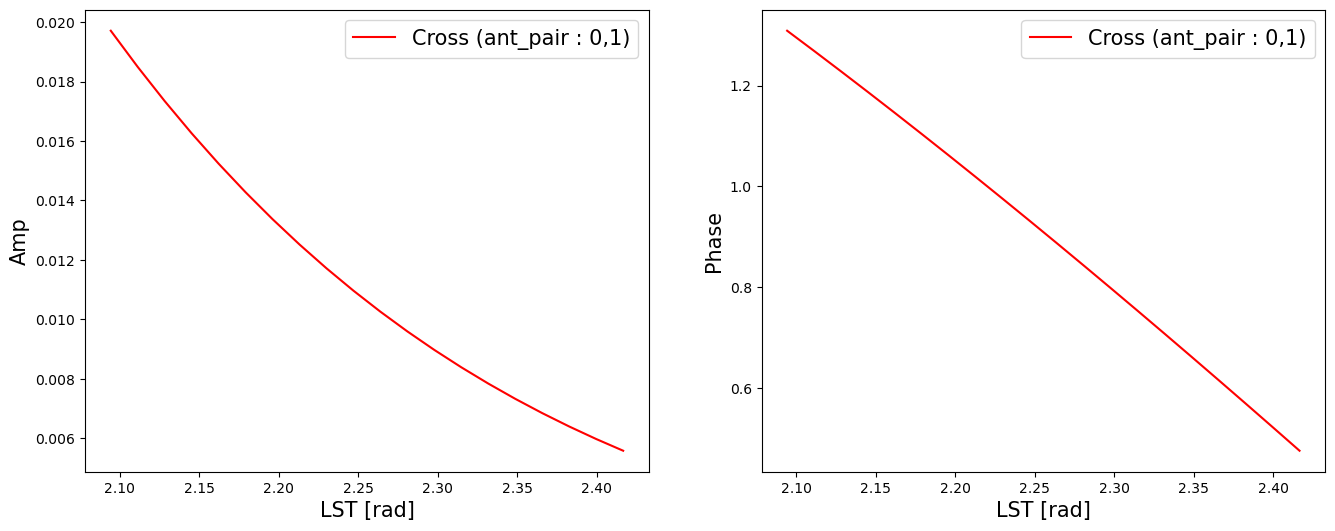

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(lsts, np.abs(vis_vc[0,:,0,1]),'r', label=r'Cross (ant_pair : 0,1)')
ax[0].set_ylabel('Amp', fontsize=15)
ax[0].set_xlabel(r'LST [rad]', fontsize=15)
ax[0].legend(fontsize=15)


ax[1].plot(lsts, np.angle(vis_vc[0,:,0,1]),'r', label=r'Cross (ant_pair : 0,1)')
ax[1].set_ylabel('Phase', fontsize=15)
ax[1].set_xlabel(r'LST [rad]', fontsize=15)
ax[1].legend(fontsize=15)

plt.show()

In the **hera_sim** repo there is wrapper which can be used to set up these operations easily, and also allows you to run vis_cpu based on pyuvsim-compatible configuration.